# An Analysis of a System of First Order Equations 

Describe system of first order PDEs in one spatial dimension and time. 

## Import Libraries

In [7]:
using LinearAlgebra
using DifferentialEquations
using SparseArrays
using FFTW 
using BenchmarkTools 
using Plots 

## Section 1: Introduction

To do: description system of coupled PDE. Apply Dirichlet bc (unlike Rik).  

## Section 2: Spatial Discretization 

Adapt matrix to first order equations. 

In [15]:
# struct to hold entire mesh
struct Mesh
  #..number of nodes of the mesh..   
  nnodes::Int64
  #..number of elements of the mesh..
  nelements::Int64 
  #..vector of x-coordinates of nodes of the mesh..
  Nodes::Vector{Float64}
end 

# function to generate a mesh on the interval 0 <= x <= 1.   
# we limit the type of input to be Int64 
function genMesh(nelements::Int64)::Mesh
    h = 1/nelements 
    nnodes = nelements+1
    Nodes = Vector{Float64}(0:h:1)    
    mesh = Mesh(nnodes,nelements,Nodes)     
    return mesh;
end 

# generate global stiffness matrix 
function genStiffMat(mesh::Mesh)

    #..recover number of elements and nodes  
    nelements = mesh.nelements
    nnodes    = nelements+1
    
    #..set mesh width and square of mesh width 
    h = 1/nelements;

    #..construct the coefficient matrix with our the boundary conditions 
    e = ones(nnodes); #..note that ones(N+1,1) does *not* work here 
    A = Tridiagonal(-e[2:end], e, 0*e[2:end]); 
    A = (1/h)*A;     
   
    return A; 
    
end

function genVector(mesh, sourceFct::F) where F 

    #..recover mesh nodes  
    nodes = mesh.Nodes
    
    #..set vector values using broadcasting (dot syntax)  
    f = sourceFct.(nodes)
   
    return f; 
end

function genBoundaries(mesh,A)
    
    #..recover number of elements and nodes  
    nelements = mesh.nelements
    nnodes = mesh.nnodes 
    
    #..set mesh width and square of mesh width 
    h = 1/nelements; h2=h*h; 
    
    #..set homogeneous Dirichlet boundary conditions at both end points  
    if (true)
        display(" Setting homogeneous Dirichet conditions on both sides")
        A[1,1] = 0.; A[1,2] = 0.; 
    else 
        error(" genSolution::Error::Boundary conditions not set")
    end 
    return A  
end

genBoundaries (generic function with 1 method)

In [22]:
nelements = 100 
mesh = genMesh(nelements); A = genStiffMat(mesh); A = genBoundaries(mesh,A); A = -A;

" Setting homogeneous Dirichet conditions on both sides"

## Section 3: Time Discretization 

To do: using macro-view to split into vector into two subvectors. See [view](https://discourse.julialang.org/t/understanding-view/18286).

In [32]:
function ode_system!(u,p,t)
    # A*u .+ 500*sin(2*π*3*t)
    .1*A*u 
end

u0 = (mesh.Nodes.>.5)

tspan = (0.0,1)

prob = ODEProblem(ode_system!,u0,tspan)
sol = solve(prob, AutoVern7(Rodas5()), reltol = 1e-8, abstol = 1e-8, save_everystep = true);

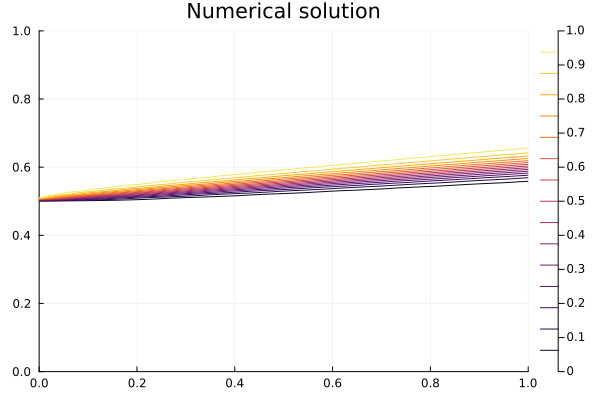

In [33]:
posind = 1:mesh.nnodes; 
U  = sol[posind,:]
p1 = contour(sol.t,mesh.Nodes,U)
title!("Numerical solution")

## References 

In [25]:
plot(sol)